/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/historical_data.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_ts = file_data.iloc[-1][0]
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_46154/2317947945.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["position"].fillna(method="ffill", inplace=True)


總績效(來回成本0.001):0.8546
交易次數:269
平均績效(來回成本0.001):0.0032
勝率:0.3532
賺賠比:2.0876
賠率:1.1398
期望值:0.0904
獲勝持有時間:5 days 20:12:37.894736842
虧損持有時間:2 days 21:49:39.310344827
MDD:1.1229


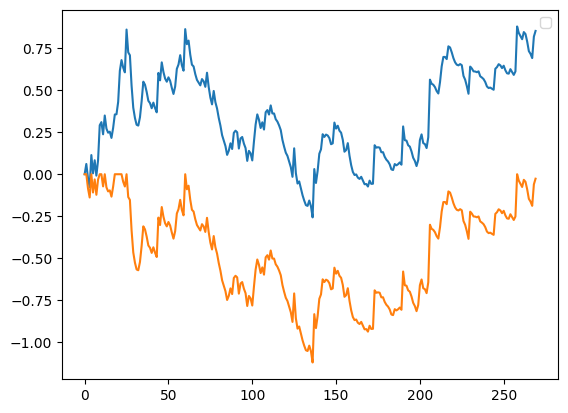

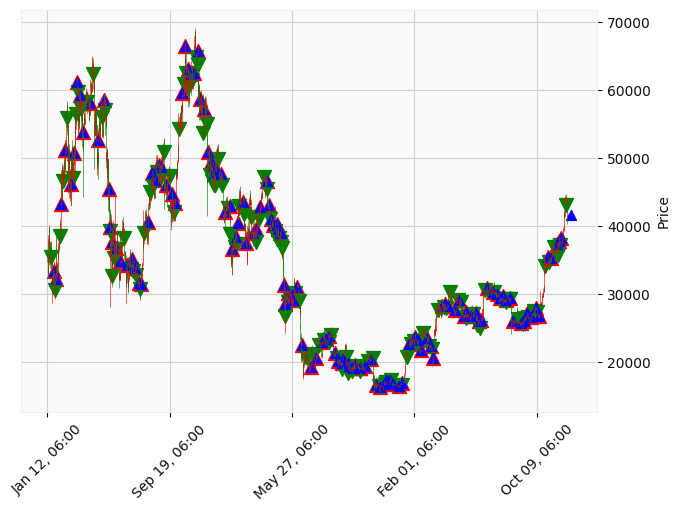

In [1]:
from backtest_class import Backtest
from talib.abstract import RSI


def run_strategy(
    self,
):
    self.data["position"] = None
    self.data["rsi"] = RSI(self.data, timeperiod=10)
    self.data["rsi_upper"] = (
        self.data.rolling(20)["rsi"].mean() + self.data.rolling(20)["rsi"].std()
    )
    self.data["rsi_lower"] = (
        self.data.rolling(20)["rsi"].mean() - self.data.rolling(20)["rsi"].std()
    )

    self.data.loc[self.data["rsi"] > self.data["rsi_upper"], "position"] = 1
    self.data.loc[self.data["rsi"] < self.data["rsi_lower"], "position"] = -1
    self.data["position"].fillna(method="ffill", inplace=True)


symbol = "BTCBUSD"
interval = "6h"
Backtest.run_strategy = run_strategy
backtest = Backtest(symbol, interval)
backtest.run_strategy()
backtest.performance()
backtest.equity_curve()
backtest.plot_order()
